In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# 맑음고딕 저는 설치안해서 안되네요 쓰실분 쓰세요 
# matplotlib.rc('font',family='Malgun Gothic')

### 데이터 구성하기

In [ ]:
df_raw = pd.read_csv('./HMEQ.csv',encoding='cp949')
df_raw

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808717,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


### 결측치 처리

- 결측치 확인

In [ ]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

- 결측치 처리   
   - value, clage : 결측치를 평균값으로 대체
   - YOJ delinq ninq : 결측치를 최빈값으로 대체

In [ ]:
# pandas 잘하시는분.. 이거 평균값, 최빈값끼리 묶어서 한번에 처리하는법 알려주세요 ㅎㅎ

df_raw['VALUE'].fillna(df_raw['VALUE'].mean(),inplace=True)
df_raw['CLAGE'].fillna(df_raw['CLAGE'].mean(),inplace=True)
df_raw['YOJ'].fillna(int(df_raw['YOJ'].mode()[0]),inplace=True)
df_raw['DELINQ'].fillna(int(df_raw['DELINQ'].mode()[0]),inplace=True)
df_raw['NINQ'].fillna(int(df_raw['NINQ'].mode()[0]),inplace=True)

In [ ]:
df_raw.isnull().sum(axis=0)

BAD         0
LOAN        0
MORTDUE     0
VALUE       0
REASON      0
JOB        81
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

### 더미변수 생성

In [ ]:
df_dummy=pd.get_dummies(df_raw)
df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [ ]:
df_dummy.isnull().sum(axis=0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

### 데이터 분할 train 7 : test 3

In [ ]:
df_raw_y = df_dummy['BAD']
df_raw_x = df_dummy.drop("BAD",axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,
                                                             df_raw_y,test_size=0.3,
                                                             random_state=1234)

### 기본 옵션으로 모델 생성

In [ ]:
gb_uncustomized = GBC(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print("Train Acc : {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Test Acc : {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Train Acc : 0.964
Test Acc : 0.942


### 학습률 변경에 따른 모델 성능 (learing rate)

In [ ]:
train_accuracy = []; test_accuracy=[]

para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GBC(learning_rate=v_learning_rate, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainScore']=train_accuracy
df_accuracy_lr['TestScore']=test_accuracy

In [ ]:
df_accuracy_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.964,0.942
1,0.2,0.982,0.940
2,0.3,0.995,0.936
3,0.4,0.999,0.933
4,0.5,1.000,0.940
5,0.6,1.000,0.934
6,0.7,1.000,0.943
7,0.8,1.000,0.932
8,0.9,1.000,0.942


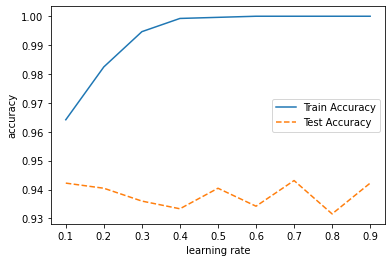

In [ ]:
plt.plot(para_lr, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('learning rate') # estimators : 추정량
plt.legend()

In [ ]:
learning_rate = 0.1

### 트리 수 변경에 따른 모델 성능 (n_estimators)

In [ ]:
train_accuracy = []; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    gb = GBC(n_estimators=v_n_estimators, learning_rate = 0.1,
             random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainScore']=train_accuracy
df_accuracy_n['TestScore']=test_accuracy

In [ ]:
df_accuracy_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.933,0.928
1,20,0.941,0.932
2,30,0.946,0.936
3,40,0.949,0.937
4,50,0.954,0.940
5,60,0.957,0.940
6,70,0.958,0.942
7,80,0.960,0.942
8,90,0.961,0.943
9,100,0.964,0.942


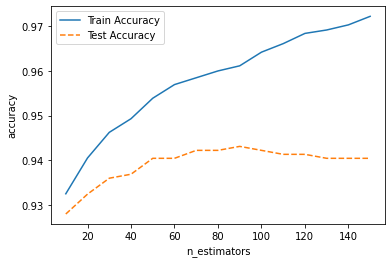

In [ ]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('n_estimators') # estimators : 추정량
plt.legend()

In [ ]:
n_estimators = 100

### 최대 깊이 변경에 따른 모델 성능 (max_depth)

In [ ]:
train_accuracy = []; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb = GBC(max_depth = v_max_depth, n_estimators = 100, learning_rate = 0.1,
             random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

In [ ]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.936,0.935
1,2,0.951,0.938
2,3,0.964,0.942
3,4,0.981,0.940
4,5,0.990,0.941
5,6,0.995,0.942
6,7,1.000,0.949
7,8,1.000,0.947
8,9,1.000,0.945
9,10,1.000,0.947


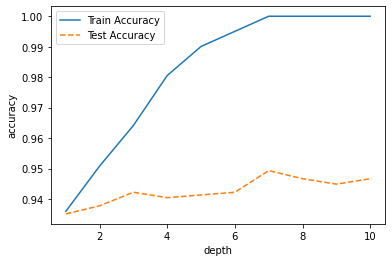

In [ ]:
plt.plot(para_depth, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

In [ ]:
max_depth=4

### 분리 노드의 최소 자료 수 변경에 따른 모델 성능 (min_samples_split)

In [ ]:
train_accuracy = []; test_accuracy = []

para_split = [n_split*10 for n_split in range(2,11)]

for v_min_samples_split in para_split :
    gb = GBC(min_samples_split=v_min_samples_split, max_depth = 4, 
             n_estimators = 100, learning_rate = 0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

In [ ]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,20,0.976,0.946
1,30,0.974,0.940
2,40,0.973,0.940
3,50,0.973,0.940
4,60,0.971,0.940
5,70,0.968,0.940
6,80,0.968,0.942
7,90,0.967,0.944
8,100,0.966,0.941


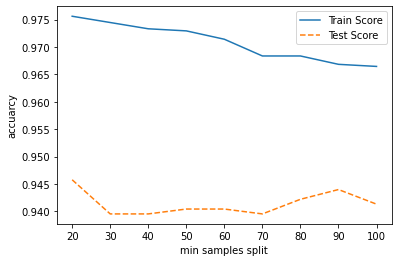

In [ ]:
plt.plot(para_split, train_accuracy, linestyle="-", label = 'Train Score')
plt.plot(para_split, test_accuracy, linestyle="--", label = 'Test Score')
plt.ylabel('accuarcy'); plt.xlabel('min samples split')
plt.legend()

### 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [ ]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    gb = GBC(min_samples_leaf = v_min_samples_leaf, max_depth = 4, 
             n_estimators = 100, learning_rate = 0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesSplit'] = para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

In [ ]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,20,0.976,0.946
1,30,0.974,0.940
2,40,0.973,0.940
3,50,0.973,0.940
4,60,0.971,0.940
5,70,0.968,0.940
6,80,0.968,0.942
7,90,0.967,0.944
8,100,0.966,0.941


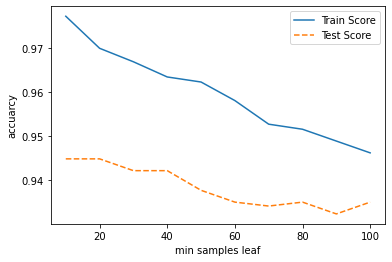

In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label = 'Train Score')
plt.plot(para_leaf, test_accuracy, linestyle="--", label = 'Test Score')
plt.ylabel('accuarcy'); plt.xlabel('min samples leaf')
plt.legend()

In [ ]:
min_samples_leaf=10

### 결론 도출

##### 최종 모델 선택

In [ ]:
gb_final = GBC(min_samples_leaf = 10, max_depth = 4, 
             n_estimators = 100, learning_rate = 0.1, random_state=1234)
gb_final.fit(df_train_x,df_train_y)
y_pred=gb_final.predict(df_test_x)

print("Train Acc : {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Test Acc : {:.3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y,y_pred)))

Train Acc : 0.977
Test Acc : 0.945
Confusion matrix : 
[[1020    1]
 [  61   43]]


##### 설명변수의 중요도

In [ ]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.343
6,CLAGE,0.111
5,DELINQ,0.104
8,CLNO,0.103
2,VALUE,0.097
0,LOAN,0.062
1,MORTDUE,0.053
7,NINQ,0.041
4,DEROG,0.036
3,YOJ,0.023


Text(0, 0.5, '설명변수')

/home/piai/anaconda3/envs/yunsu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/envs/yunsu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/envs/yunsu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/envs/yunsu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/envs/yunsu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/envs/yunsu/lib/pyth

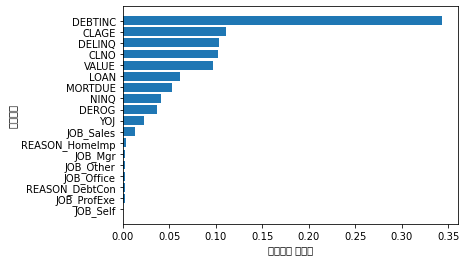

In [ ]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')